<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-qi/blob/master/porosity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
!git clone https://github.com/yohanesnuwara/reservoir-qi

Cloning into 'reservoir-qi'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 68 (delta 25), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (68/68), done.


Synthetic data (in limestone formation)

In [0]:
depth = np.array([11508, 11522, 11545, 11560, 11593, 11615, 11631, 11645, 11655, 11665, 11696])
dt = np.array([51, 47, 57, 48, 50, 51, 67, 52, 57, 52, 50]) # sonic traveltime
rhob = np.array([2.73, 2.75, 2.67, 2.96, 2.7, 2.97, 2.5, 2.82, 2.64, 2.68, 2.76]) # bulk density
nphi = np.array([0.005, 0.09, 0.13, -0.01, 0, -0.01, 0.29, 0.14, 0.16, 0.01, 0.01]) # neutron porosity

data = pd.DataFrame({"Depth": depth, "DT": dt, "RHOB": rhob, "NPHI": nphi})
data

,Depth,DT,RHOB,NPHI
0,11508,51,2.73,0.005
1,11522,47,2.75,0.090
2,11545,57,2.67,0.130
3,11560,48,2.96,-0.010
4,11593,50,2.70,0.000
5,11615,51,2.97,-0.010
6,11631,67,2.50,0.290
7,11645,52,2.82,0.140
8,11655,57,2.64,0.160
9,11665,52,2.68,0.010


Calculate sonic porosity from traveltime (Wyllie and Raymer-Hunt-Gardner)

In [0]:
# wyllie
dtma_wyllie_lst = 47.6; dtma_wyllie_dol = 43.5 # us/ft, limestone and dolomite matrix traveltime using Wyllie (Tab 4.1)
dtfl_water = 189
sphi_wyllie_lst = (dt - dtma_wyllie_lst) / (dtfl_water - dtma_wyllie_lst)
sphi_wyllie_dol = (dt - dtma_wyllie_dol) / (dtfl_water - dtma_wyllie_dol)
# rhg
dtma_rhg_lst = 49; dtma_rhg_dol = 44 # us/ft, limestone and dolomite matrix traveltime using Raymer-Hunt-Gardner (Tab 4.1)
sphi_rhg_lst = (5 / 8) * ((dt - dtma_rhg_lst) / dt)
sphi_rhg_dol = (5 / 8) * ((dt - dtma_rhg_dol) / dt)

result = pd.DataFrame({"Depth": depth, "DT": dt, "RHOB": rhob, "NPHI": nphi, "SPHI lst (Wyllie)": sphi_wyllie_lst, 
                       "SPHI dol (Wyllie)": sphi_wyllie_dol, "SPHI lst (RHG)": sphi_rhg_lst, "SPHI dol (RHG)": sphi_rhg_dol})
result

,Depth,DT,RHOB,NPHI,SPHI lst (Wyllie),SPHI dol (Wyllie),SPHI lst (RHG),SPHI dol (RHG)
0,11508,51,2.73,0.005,0.024045,0.051546,0.024510,0.085784
1,11522,47,2.75,0.090,-0.004243,0.024055,-0.026596,0.039894
2,11545,57,2.67,0.130,0.066478,0.092784,0.087719,0.142544
3,11560,48,2.96,-0.010,0.002829,0.030928,-0.013021,0.052083
4,11593,50,2.70,0.000,0.016973,0.044674,0.012500,0.075000
5,11615,51,2.97,-0.010,0.024045,0.051546,0.024510,0.085784
6,11631,67,2.50,0.290,0.137199,0.161512,0.167910,0.214552
7,11645,52,2.82,0.140,0.031117,0.058419,0.036058,0.096154
8,11655,57,2.64,0.160,0.066478,0.092784,0.087719,0.142544
9,11665,52,2.68,0.010,0.031117,0.058419,0.036058,0.096154


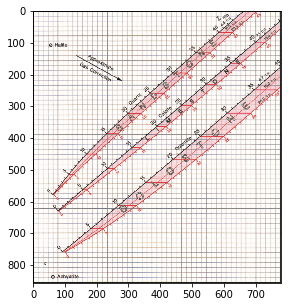

In [0]:
neutron_density_xplot = plt.imread('/content/reservoir-qi/well-log-charts/Fig 4.11 Neutron-density crossplot.PNG')
plt.figure(figsize=(15, 5))
plt.imshow(neutron_density_xplot)

In [0]:
def xplot(axisx, axisy, axisz):
  plt.scatter(axisx, axisy, c=axisz, s=40, cmap='gist_rainbow')
  plt.colorbar()

Text(0, 0.5, 'Bulk Density (*150 g/cc)')

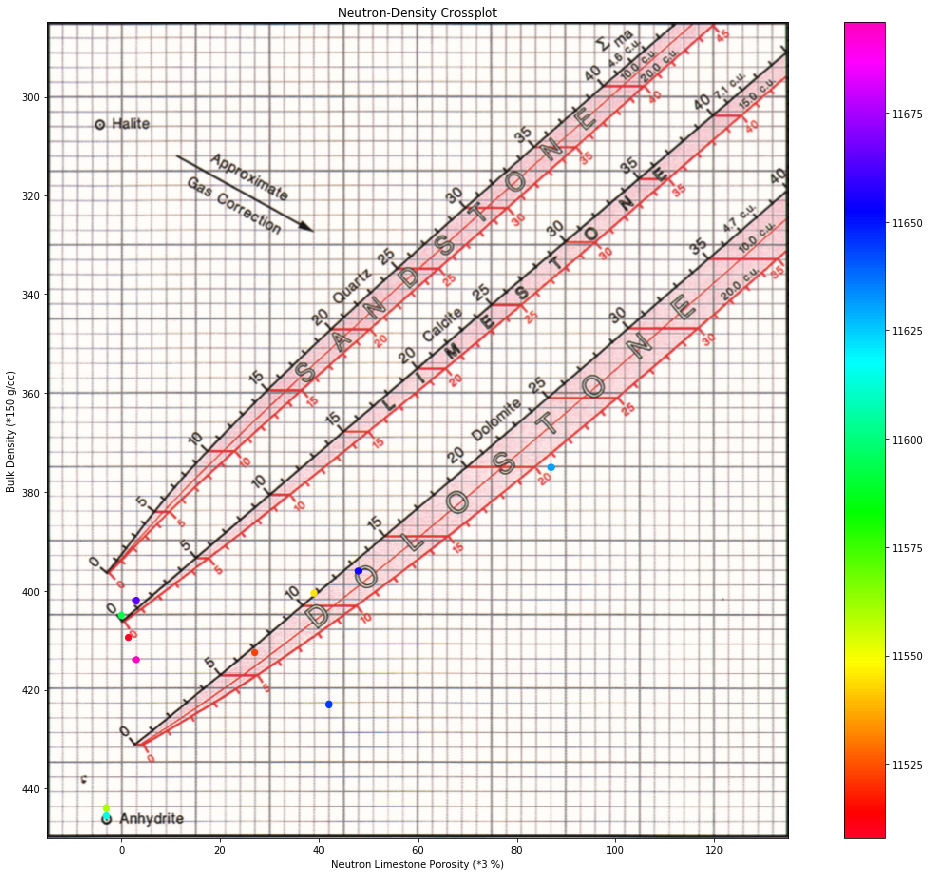

In [0]:
xratio = 3; yratio = 150
extent = [-5 * xratio, 45 * xratio, 3 * yratio, 1.9 * yratio] # format: (x axis 1, x axis 2, y axis 1, y axis 2) 
plt.figure(figsize=(20, 15))

z = depth
xplot((nphi * 100 * xratio), (rhob * yratio), depth)

plt.imshow(neutron_density_xplot, extent=extent)
plt.title("Neutron-Density Crossplot")
plt.xlabel("Neutron Limestone Porosity (*3 %)"); plt.ylabel("Bulk Density (*150 g/cc)")

# ***

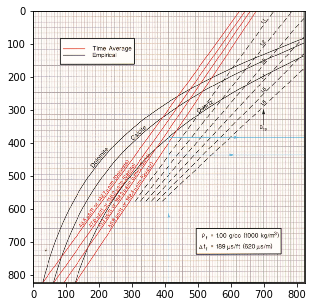

In [0]:
sphi = plt.imread('/content/reservoir-qi/well-log-charts/Fig 14-2 traveltime_to_sonicporosity.PNG')
plt.figure(figsize=(15, 5))
plt.imshow(sphi)

Text(0, 0.5, 'Sonic Porosity (%)')

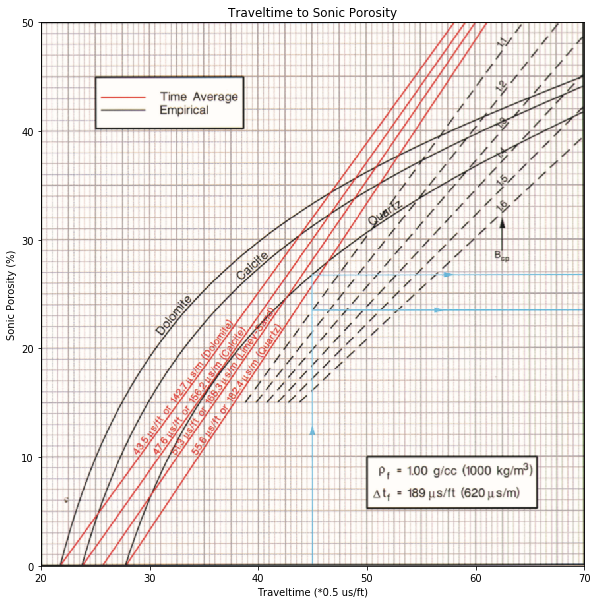

In [0]:
extent = (20, 70, 0, 50) # format: (x axis 1, x axis 2, y axis 1, y axis 2)
plt.figure(figsize=(10, 10))
plt.imshow(sphi, extent=extent)
plt.title("Traveltime to Sonic Porosity")
plt.xlabel("Traveltime (*0.5 us/ft)"); plt.ylabel("Sonic Porosity (%)")